# **Proyek Analisis Data: Bike Sharing Dataset**

* Nama: Muhammad Hamzah Fyrzatullah
* Email: muhammadhamzahf@gmail.com
* Id Dicoding: muhamzahf97


## **Menentukan Pertanyaan Bisnis**

*   Apakah cuaca berpengaruh terhadap jumlah pengguna sepeda?
*   Apakah bulan yang paling banyak diminati bagi penyewa sepada?
*   Bagaimana kondisi ketika sepeda digunakan pada workingday dan holiday?
*   Hari apakah yang sangat diminati bagi para Penyewa Sepeda?



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

##**Data Wrangling**
###**Gathering Data**

Pada tahap ini kita mengambil data yang telah dikumpulkan. Saya memgabil **Bike Sharing Dataset** dan mengimpor **file day.csv**


###Load table day

In [ ]:
day_df = pd.read_csv("day.csv")

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##**Assessing Data**
####**Menilai day_df**


In [ ]:
# Memeriksa tipe data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari data diatas, terdapat 1 tipe data bedasarkan kolomnya yang tidak sesuai dengan data yang diperbaiki yaitu: dteday -> datetime

In [ ]:
# Memeriksa ada missing values
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kesimpulannya bahwa table day_df tidak ada missing values, data tersebut aman.

In [ ]:
# Memeriksa ada missing values
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


Pada Table **day_df** terdapat 0 data yang double yang artinya semua data bersifat unik.

In [ ]:
# Memeriksa terdapat keanehan nilai statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##**Cleaning Data**


In [ ]:
# Menghapus beberapa kolom yang tidak akan digunakan
drop_col =['instant', 'windspeed']
for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [ ]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [ ]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3:'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clean/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [ ]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clean/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clean/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clean/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


##**Exploratory Data Analysis(EDA)**
**Eksplorasi Data day_d**f


In [ ]:
# Pengelompokan penyewa sepeda berdasarkan bulan
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

In [ ]:
# Pengelompokan penyewa sepeda berdasarkan kondisi cuaca
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})


count                           
                      max  min         mean      sum
weather_cond                                        
Clean/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil diatas bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika cerah atau mendung. Sedangkan ketika cuaca turun salju dan hujan sangat sedikit untuk menyewa sepedaa.

In [ ]:
# Pengelompokan penyewa sepeda berdasarkan holiday
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Hasil data diatas bahwa penyewa sepeda lebij suka menyewa sepeda saat bukan hari libur, tetapi pada hari biasa.

In [ ]:
# Perbandingan penyewa sepeda bedasarkan weekday
day_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean']
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Hasil data diatas, urutan rata-rata jumlah penyewa sepeda dari yang terbesar ke yang terkecil yaitu: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

In [ ]:
# Pengelompokan penyewa sepeda berdasarkan workingday
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Hasil data diatas, jumlah penyewaan sepeda terbesar jatuh di workingday dibandingkan dengan hari non-workingday. Namun hasilnya cukup berbeda.

In [ ]:
# Pengelompokan penyewa sepeda berdasarkan season
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Hasil data diatas, para penyewa sepeda baik Casual dan Registered sangat suka bersepeda rata-rata di musim gugur(Fall). sedangkan paling sedikit buat penyewa sepeda pada musim semi(spring)

In [ ]:
# Pengelompokan temp, hum dan humidity berdasarkan season
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

Hasil data diatas disimpukan pernyataan sebagai berikut:


*   Rata-rata temperature dan atemp tertinggi terjadi pada musim gugur (fall season) yang selanjutnya diikuti oleh summer, winter, dan spring.
*   Rata-rata humdity tertinggi terjadi pada musim dingin(winter season) dan atemp tertinggi terjadi pada musim gugur (fall season) yang selanjutnya diikuti oleh summer, winter, dan spring.



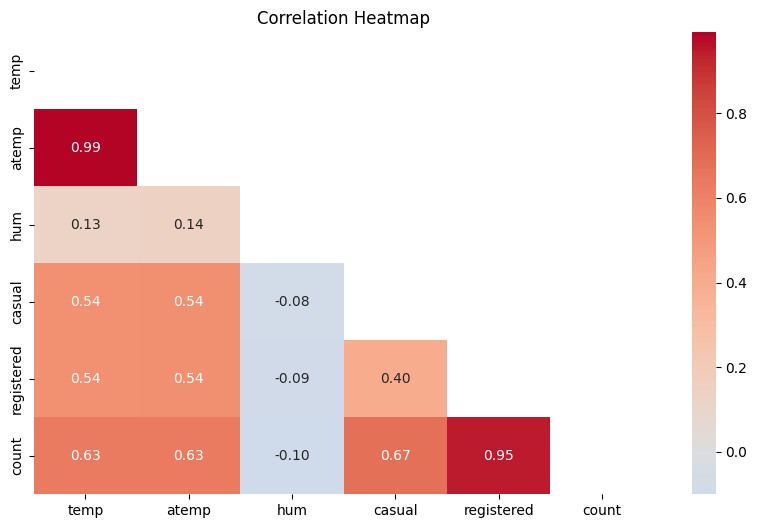

In [ ]:
# Korelasi Matriks untuk mencari korelasi antar atribut data
fig, ax = plt.subplots(figsize=(10, 6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Hasil analisis diatas, pernyataan sebagai berikut:


*   atemp dan temp sangat berkorelasi(0.99)
*   hum memiliki korelasi lemah dengan temp dan atemp(0.13 dan 0.14)
*   casual berkorelasi dengan temp dan atemp(0.54) dan sedikit negatif dengan hum(-0.08)
*   registered mempunyai pola yang sama seperti casual dan berkorelasi moderat dengan casual(0.40)
*   count berkolerasi kuat dengan  temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), dan sedikit negatif dengan hum (-0.10).







# **Visualization & Explanatory Analysis**

### **Pertanyaan 1: Apakah cuaca berpengaruh terhadap jumlah pengguna sepeda?**



[Text(0.5, 1.0, 'Jumlah Penyewa Sepeda berdasarkan musim')]

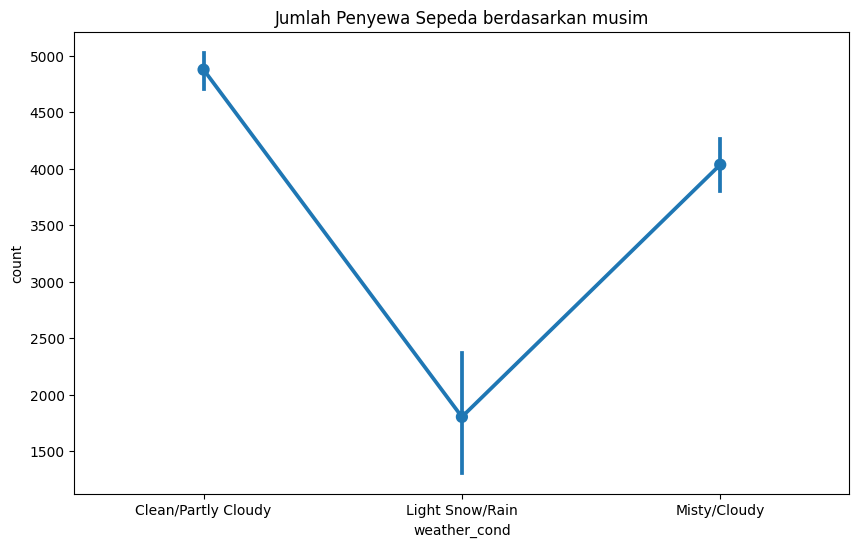

In [ ]:
# Memvisualisasikan jumlah penumpang bulanan sepanjang musim
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=day_df[['weather_cond','count']],x='weather_cond', y='count', ax=ax)
ax.set(title='Jumlah Penyewa Sepeda berdasarkan musim')

Dari visualisasi data di atas menggunakan pointplot, kesimpulan sangat jelas hubungan cuaca dan penyewa sepeda. Kondisi cuaca saat sedang cerah/sebagian mendung menjadi kondisi yang paling paling diminati, diikuti dengan cuaca berkabut/mendung dan terakhir pada saat cuaca sedikit bersalju/hujan sangat sedikit peminat untuk penyewa sepeda.

### Pertanyaan 2: Apakah bulan yang paling banyak diminati bagi penyewa sepada?

[Text(0.5, 1.0, 'Jumlah Penyewa Sepeda berdasarkan bulan')]

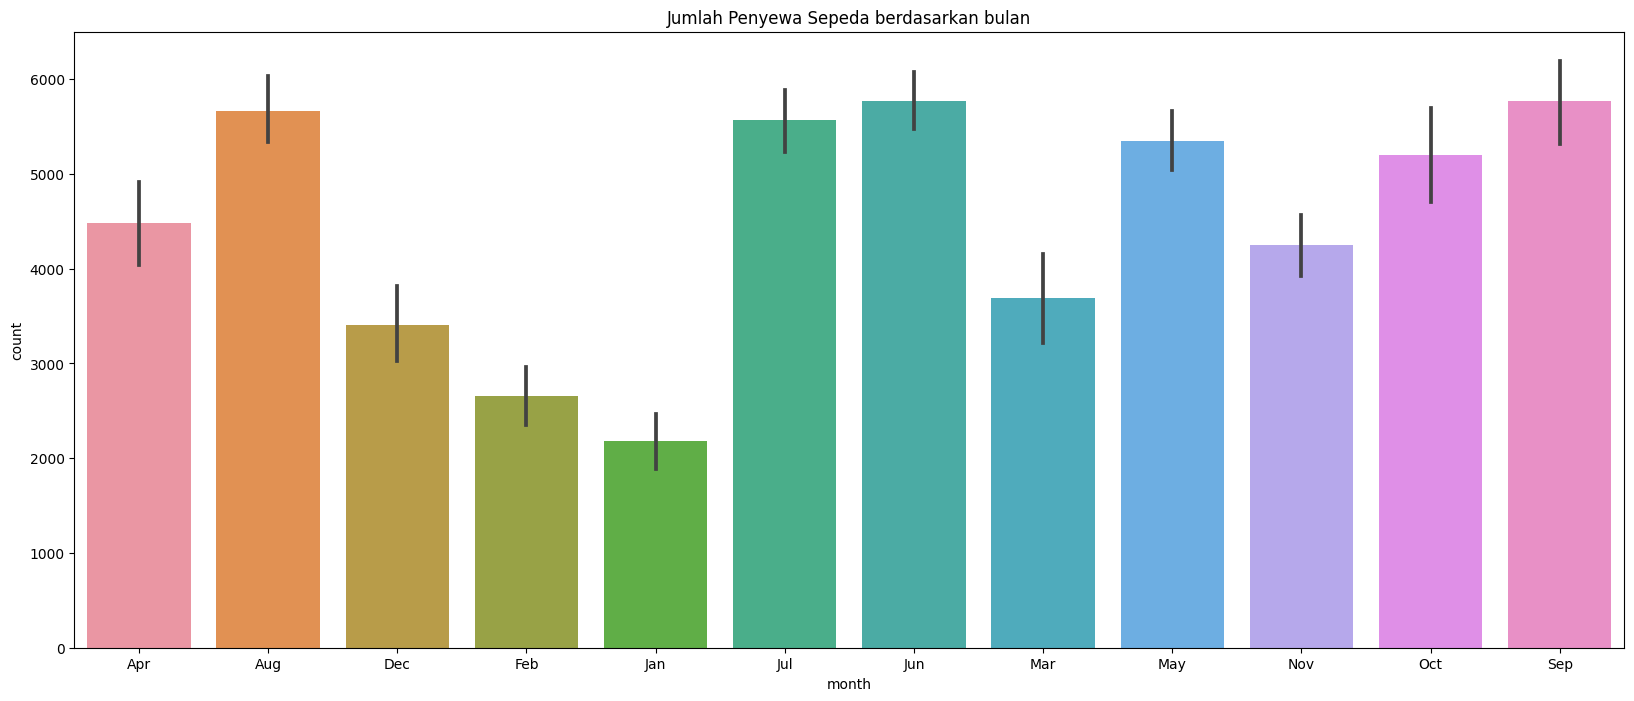

In [ ]:
 # Memvisualisasikan distribusi pengguna sepeda berdasarkan bulan
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=day_df[['month','count']], x='month', y='count', ax=ax)
ax.set(title='Jumlah Penyewa Sepeda berdasarkan bulan')

Hasil dari Visualisasi Data diatas jumlah
penyewa sepeda paling banyak di bulan Mei, Juni, Juli, Agustus, September karena bulan tersubut merupakan musim Panas.

Sedangkan bulan Oktober November jumlah penyewa sepeda mengalami penurunan di Musim Gugur.

Sedangkan bulan Desember, Januari dan Februari penyewa sepeda sangat sedikit menggunakan sepeda karena berada di Musim Dingin Bersalju.

Sedangkan Bulan Maret dan April mengalami peningkatan penyewa sepeda karema memasuki musim semi

### **Pertanyaan 3: Bagaimana kondisi ketika sepeda digunakan pada workingday dan holiday?**

Hasil dari Visualisasi data diatas jumlah penyewa sepeda jauh lebih banyak pada hari biasa (bukan hari libur) dibandingkan hari libur (nasional).0 menandakan akhir pekan dan 1 menandakan hari kerja.







[Text(0.5, 1.0, 'Jumlah Penyewa Sepeda berdasarkan holiday')]

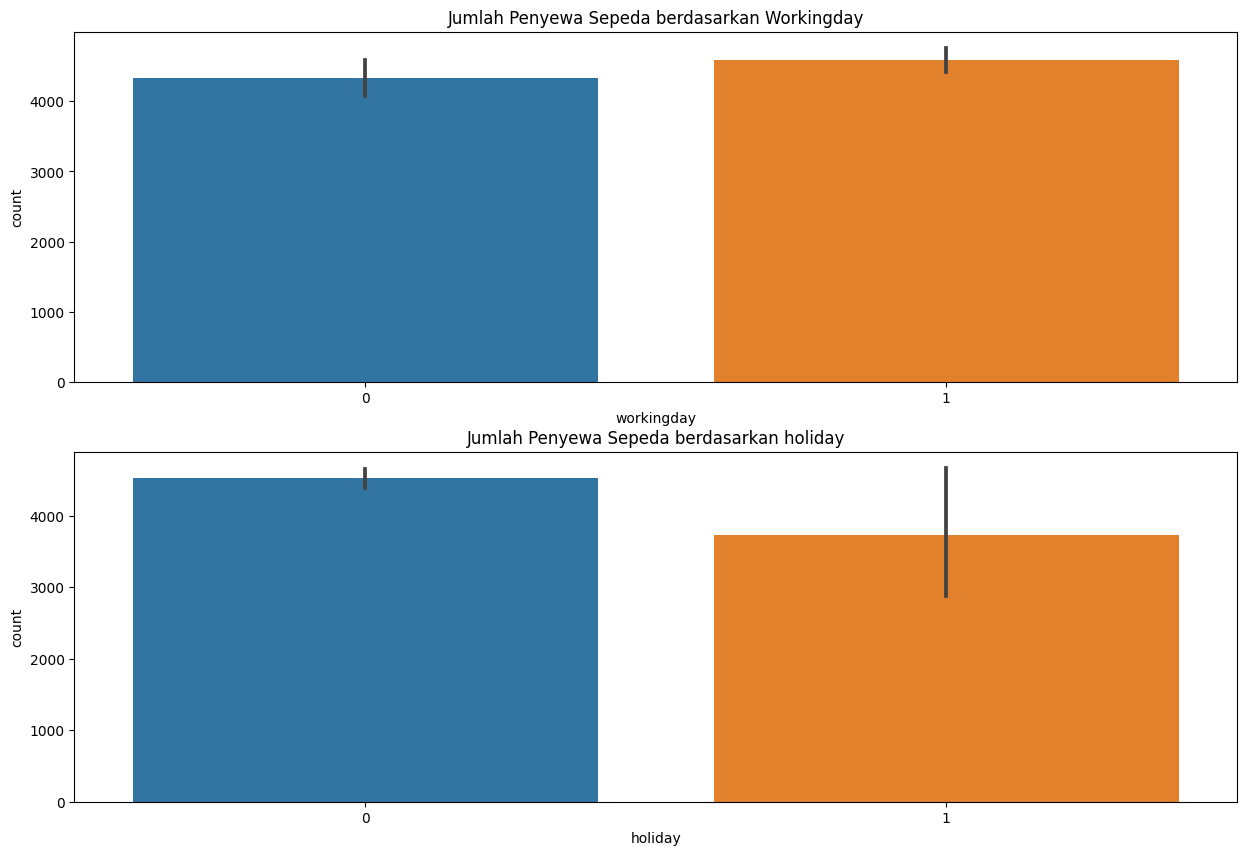

In [ ]:
# Memvisualisasikan sepeda berdasarkan workingday&holiday
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

# Berdasarkan workingday
sns.barplot(data=day_df[['workingday','count']], x='workingday', y='count', ax=axes[0])
axes[0].set(title='Jumlah Penyewa Sepeda berdasarkan Workingday')

# Berdasarkan holiday
sns.barplot(data=day_df[['holiday','count']], x='holiday', y='count', ax=axes[1])
axes[1].set(title='Jumlah Penyewa Sepeda berdasarkan holiday')

### **Pertanyaan 4: Hari apakah yang sangat diminati bagi para Penyewa Sepeda?**

[Text(0.5, 1.0, 'Jumlah Penyewa Sepeda berdasarkan hari')]

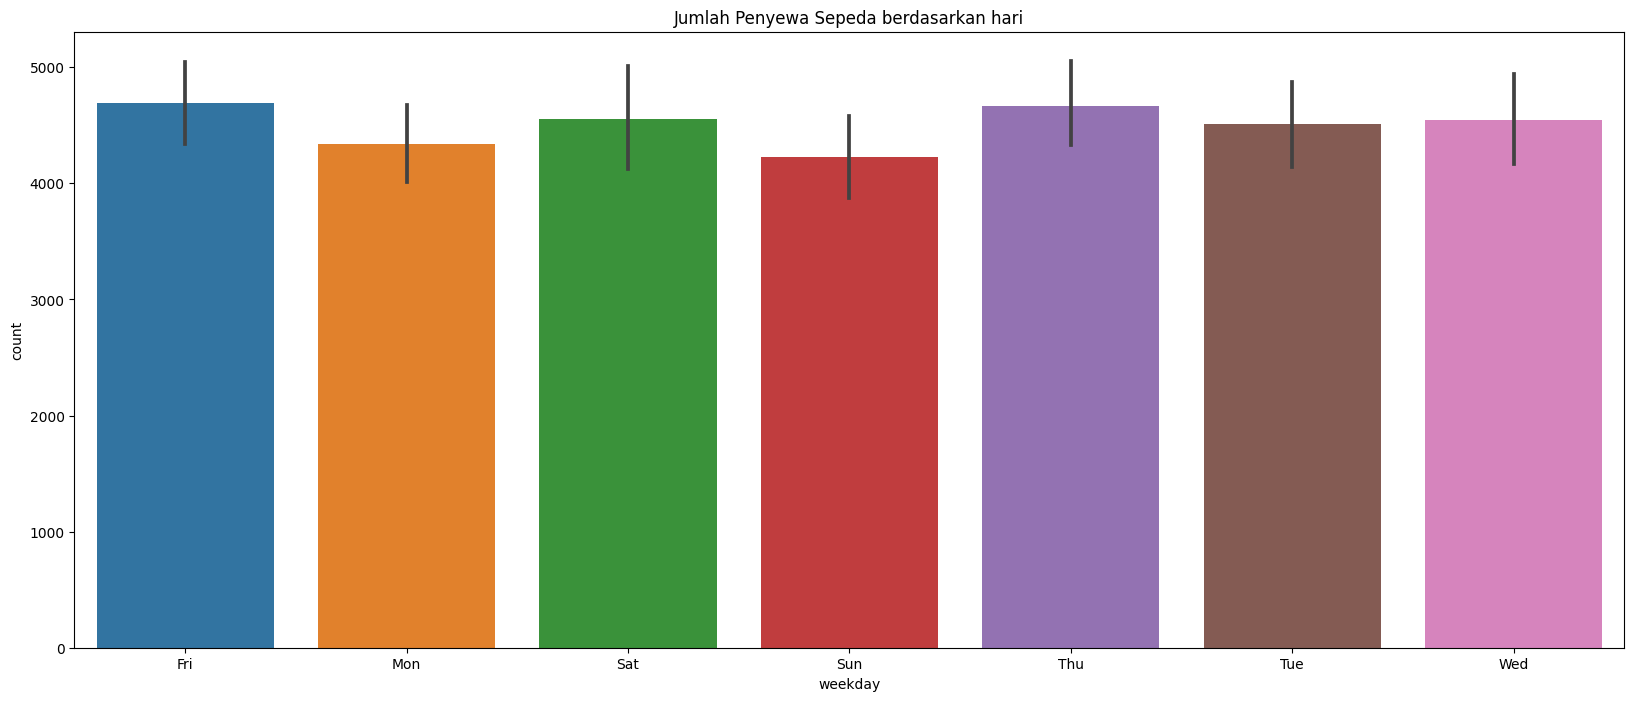

In [ ]:
# Memvisualisasikan sepeda berdasarkan hari
fig,ax =plt.subplots(figsize=(20, 8))
sns.barplot(data=day_df[['weekday','count']], x='weekday', y='count', ax=ax)
ax.set(title='Jumlah Penyewa Sepeda berdasarkan hari')

Hasil dari Visualisasi Data diatas Jumlah penyewa sepeda paling banyak di Hari Jum'at dan hari Minggu sebagai hari paling sedikit bagi penyewa sepeda.

# **Conclusion**

*   Conclusion pertanyaan 1:
    
    Dapat terlihat jelas, para penyewa sepeda sangat menyukai ketika cuaca sedang cerah dengan Q3 diatas 6000 dan Q1 kurang dari 4000 serta mediannya hampir 5000. Diposisi kedua ditempati ketika cuaca yg sedang Mendung/Berkabut dengan Q3 diatas 5000 dan Q1 dibawah 3000 serta mediannya diatas 4000. Terakhir pengguna kurang menyukai ketika cuaxa sedikit bersalju/Hujan dengan Q3 diatas 2000 dan Q1 dibawah 1000 serta mediannya diatas 1000.

*   Conclusion pertanyaan 2:

    Kondisi yang terdapat visualisasi diatas bahwa jumlah penyewa persepada paling banyak bulan yang puncak musim panas Juni(6000), Juli(5500), Agustus(6000) dan september(5900). Sedangkan musim gugur mengalami penurunan di bulan Oktober(5500) dan November(4500). Di bulan Desember(3000), Januari(2000) dan Februari(2500) jumlah penyewa sepeda sangat turun drastis karena memasuki Musim Dingin Bersalju/Hujan. Sedangkan di Musim semi bulan Maret(4000) dan April(4500) jumlah penyewa sepeda kembali meningakat karena musim dingin berakhir.

*   Conclusion Pertanyaan 3:

    Visualisasi kali ini dapat diamati bahwa jumlah penyewa sepeda lebih tinggi di hari workingday ketimbang holiday.
*   Conclusion Pertanyaan 4:

    Pada visualisasi diatas jumlah penyewa sepeda terbanyak pada hari Friday(Jum'at) sebanyak 5000, sedangakan paling sedikit penyewa sepeda pada hari Sunday(Minggu) 4000.



